# Normal distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats

food = pd.read_pickle("../data/processed/food")

The normal distribution is central to our ability to infer about a population from a sample. The normal distribution looks like this (by Dan Kernler from Wikimedia Commons, CC BY-SA 4.0):

<a title="By Dan Kernler [CC BY-SA 4.0 
 (https://creativecommons.org/licenses/by-sa/4.0
)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Empirical_Rule.PNG"><img width="512" alt="Empirical Rule" src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG"></a>

The normal distribution was discovered by Gauss (which is why it's also sometimes called the Gaussian distribution) and described an 'ideal' situation. Lots of data follow this pattern: the height or weight of a population;  The mean of the normal distribution ($\mu$ on the diagram above) is the centre. Because the normal distribution is **symmetrical** we know that 50% of cases fall below and 50% of cases fall above the mean.

Another useful property of the normal distribution is we know, or can calculate, how many cases fall with 1, 2, 3, or more standard deviations of the mean (these are shown as $\mu \pm \sigma; \mu \pm 2\sigma; \mu \pm 3\sigma$ on the figure). These are about 68%, 95%, and 97.5% respectively.

|Number of $\sigma$ from mean | Percent of cases|
|-----------------------------|-----------------|
| 1                           | 68.27%          |
| 1.96                        | 95%             |
| 2                           | 95.45%          |
| 2.58                        | 99%             |
| 3                           | 99.73%          |

Therefore if we know the mean ($\mu$) and standard deviation ($\sigma$) of our sample we can calculate the confidence interval of our sample mean (as we did above). Typically we calculate a 95% confidence interval (although 99% is also common), and this tells us the likely range the population mean falls within. This is why we used the figure 1.96 when calculating our confidence interval earlier, and this is the property that allows us to infer information about the population from our smaller sample.

The other, related, way we can use this information is if we have a mean and standard deviation and observe a data point, we can calculate how many standard deviations from the mean this data point is. We can then see if the observed data point falls within the normal variation we expect (i.e. within 1.96 standard deviations for 95% confidence) or outside it, and is therefore the result of something not within the normal range.

Remember our household weekly income example, after we removed the top--coded responses? It looked something like this:

Text(0, 0.5, 'Frequency')

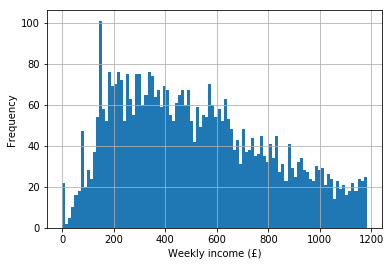

In [2]:
food.P344pr.hist(bins = 100)
plt.xlabel("Weekly income (£)")
plt.ylabel("Frequency")

The mean income is:

In [3]:
food.P344pr.mean()

518.3056177244473

and the standard deviation is:

In [4]:
food.P344pr.std()

290.22464409300136

Now let's imagine we find a respondent who lives in Chelsea and we ask them to complete our survey. They respond that their income is £2,000 per week. Does this fall within the variability we expect, or is it statistically significantly likely that this respondent has a higher income than most? Well, we can calculate how many standard deviations our observed data point is away from the mean. We know:

$$
2000 = \mu + x.\sigma
$$

where $\mu$ is the mean, $\sigma$ is the standard deviation, and $x$ is the number of standard deviations we want to calculate. If we rearrange the equation we get:

$$
\frac{2000}{\sigma} = \frac{\mu}{\sigma} + x
$$

$$
\frac{(2000 - \mu)}{\sigma} = x
$$

Plugging in the mean and standard deviation we get:

In [5]:
(2000 - food.P344pr.mean()) / food.P344pr.std()

5.1053362022583775

So our observed data point is more than five standard deviations higher than the mean, which means that if we were to interview 3.5 million people, only one would have an income that high. It's therefore highly likely that this respondent has a higher income than the average. In physics this would be known as a 'five-sigma' result: i.e. the result is more than five standard deviations ($\sigma$) from the mean and is therefore highly unlikely to be through chance alone (in the social sciences we usually opt for the '1.96 sigma' rule).

Not all observed data form a perfect normal distribution (in fact most differ at least slightly). There are two ways we need to describe a distribution if it is different from the normal: skewness and kurtosis.

## Skewness

A normal distribution has its mean, median, and mode at the same point (the centre). Skewness means the data points are skewed one way or the other:

<a title="By Rodolfo Hermans (Godot) at en.wikipedia. [CC BY-SA 3.0 
 (https://creativecommons.org/licenses/by-sa/3.0
)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Negative_and_positive_skew_diagrams_(English).svg"><img width="500" alt="Negative and positive skew diagrams (English)" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/500px-Negative_and_positive_skew_diagrams_%28English%29.svg.png"></a>

Negative skew means the tail is to the left; positive skew means the tail is to the right. In a positively skewed distribution the mode and median are lower than the mean. In a negatively skewed distribution the median and mode are higher than the mean.

## Kurtosis

Kurtosis refers to how bunched (clustered) around the mean the data points are. Positive kurtosis (leptokurtic) means the points are clustered around the mean, making the distribution narrower and taller than a normal distribution. Negative kurtosis (platykurtic) means the data points are spread out more widely, resulting in a distribution that is flatter and broader than a normal distribution.

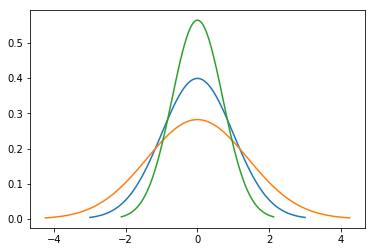

In [6]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
normal = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)  # probability density func
plt.plot(normal, scipy.stats.norm.pdf(normal, mu, sigma))

variance = 2
sigma = math.sqrt(variance)
platykurtic = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(platykurtic, scipy.stats.norm.pdf(platykurtic, mu, sigma))

variance = 0.5
sigma = math.sqrt(variance)
leptokurtic = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(leptokurtic, scipy.stats.norm.pdf(leptokurtic, mu, sigma))

plt.show()

In the figure above:

- the **blue** line is a normal distribution,
- the **green** line is a distribution with positive kurtosis (leptokurtic)
- the **orange** line is a distribution with negative kurtosis (platykurtic)